In [1]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("/content/smoke.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,161
1,160
2,157
3,153
4,149
...,...
1123,355
1124,354
1125,353
1126,352


In [3]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe

,ds,y
0,2017-09-07,161
1,2017-09-08,160
2,2017-09-09,157
3,2017-09-10,153
4,2017-09-11,149
...,...,...
1018,2020-06-21,376
1019,2020-06-22,376
1020,2020-06-23,375
1021,2020-06-24,375


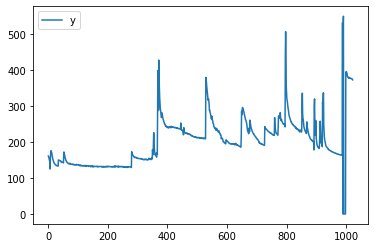

In [4]:
dataframe.plot()

In [5]:
from fbprophet import Prophet
size = (70/100) * len(dataframe)
train = dataframe[0:int(size)]
test = dataframe[int(size):]
model = Prophet()

In [6]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [8]:
futureDates = model.make_future_dataframe(periods=len(test))
predictions = model.predict(futureDates)
predictions = predictions.tail(len(test))
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
716,2019-08-24,217.644808,180.371280,256.409842,217.644808,217.644808,-1.505220,-1.505220,-1.505220,-1.505220,-1.505220,-1.505220,0.0,0.0,0.0,216.139587
717,2019-08-25,217.566574,180.102892,257.700497,217.566574,217.566574,-0.782536,-0.782536,-0.782536,-0.782536,-0.782536,-0.782536,0.0,0.0,0.0,216.784038
718,2019-08-26,217.488340,178.856645,254.364654,217.488340,217.488340,1.920243,1.920243,1.920243,1.920243,1.920243,1.920243,0.0,0.0,0.0,219.408582
719,2019-08-27,217.410106,180.219765,255.325398,217.410106,217.410106,1.007282,1.007282,1.007282,1.007282,1.007282,1.007282,0.0,0.0,0.0,218.417388
720,2019-08-28,217.331871,176.579257,255.883261,217.331871,217.331871,-0.911512,-0.911512,-0.911512,-0.911512,-0.911512,-0.911512,0.0,0.0,0.0,216.420359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2020-06-21,194.018103,117.932516,266.356672,131.023294,256.765077,-0.782536,-0.782536,-0.782536,-0.782536,-0.782536,-0.782536,0.0,0.0,0.0,193.235567
1019,2020-06-22,193.939869,120.092870,268.186876,130.806554,257.283253,1.920243,1.920243,1.920243,1.920243,1.920243,1.920243,0.0,0.0,0.0,195.860111
1020,2020-06-23,193.861635,120.096055,266.687305,130.501756,257.567586,1.007282,1.007282,1.007282,1.007282,1.007282,1.007282,0.0,0.0,0.0,194.868917
1021,2020-06-24,193.783401,118.576153,271.179581,130.128106,257.707440,-0.911512,-0.911512,-0.911512,-0.911512,-0.911512,-0.911512,0.0,0.0,0.0,192.871888


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test[['y']],predictions[['yhat']])
mse

6839.542120116311

In [10]:
preds = predictions['yhat'].tolist()

In [11]:
import pickle
import pickle
with open('/content/smoke_model_fbprohpet.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [13]:
forecasting={
    
    'Day-1':preds[0],
    'Day-2':preds[1],
    'Day-3':preds[2],
    'Day-4':preds[3],
    'Day-5':preds[4],
    'Day-6':preds[5],
    'Day-7':preds[6],
    'MSE': mse
}

In [15]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("../content/sensors-forecasting-fc27d-firebase-adminsdk-krgvi-403182645e.json")
firebase_admin.initialize_app(cred,{'databaseURL':'https://sensors-forecasting-fc27d-default-rtdb.firebaseio.com/'})
ref = db.reference("/Models/fbProphet")
upload_ref = ref.child('Smoke')
upload_ref.update(forecasting)